In [17]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from scipy.stats import kurtosis, skew
import seaborn as sns
from scipy.stats import ttest_ind

In [18]:
df = pd.read_csv('AAPL, 1D 01012007-12072023.csv', encoding='latin1')
df

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578
...,...,...,...,...,...,...,...,...
4154,4.515552e+07,190.8214,189.8400,191.8100,192.0200,189.2000,1688616000,562755
4155,4.675750e+07,191.4218,191.4100,190.6800,192.6700,190.2400,1688702400,538826
4156,5.991216e+07,188.3628,189.2600,188.6100,189.9900,187.0350,1688961600,736912
4157,4.663812e+07,187.8219,189.1600,188.0800,189.3000,186.6000,1689048000,577717


In [19]:
df.isnull().sum()

volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64

In [20]:
df.dtypes

volume          float64
vwap            float64
open            float64
close           float64
high            float64
low             float64
time              int64
transactions      int64
dtype: object

In [21]:
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

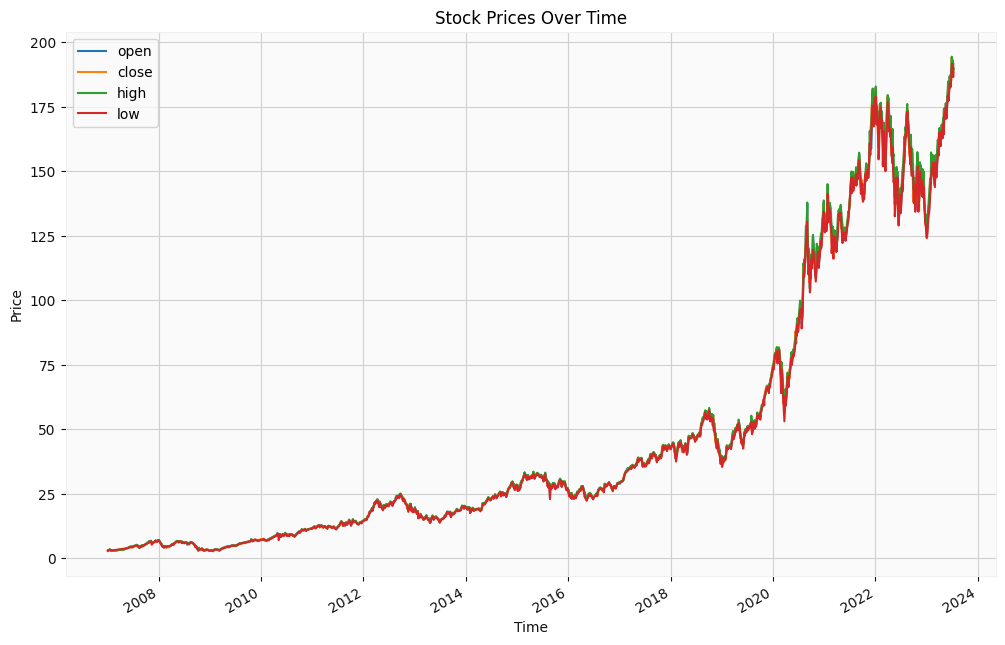

In [22]:
df[['open', 'close', 'high', 'low']].plot(figsize=(12, 8))
plt.title('Stock Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

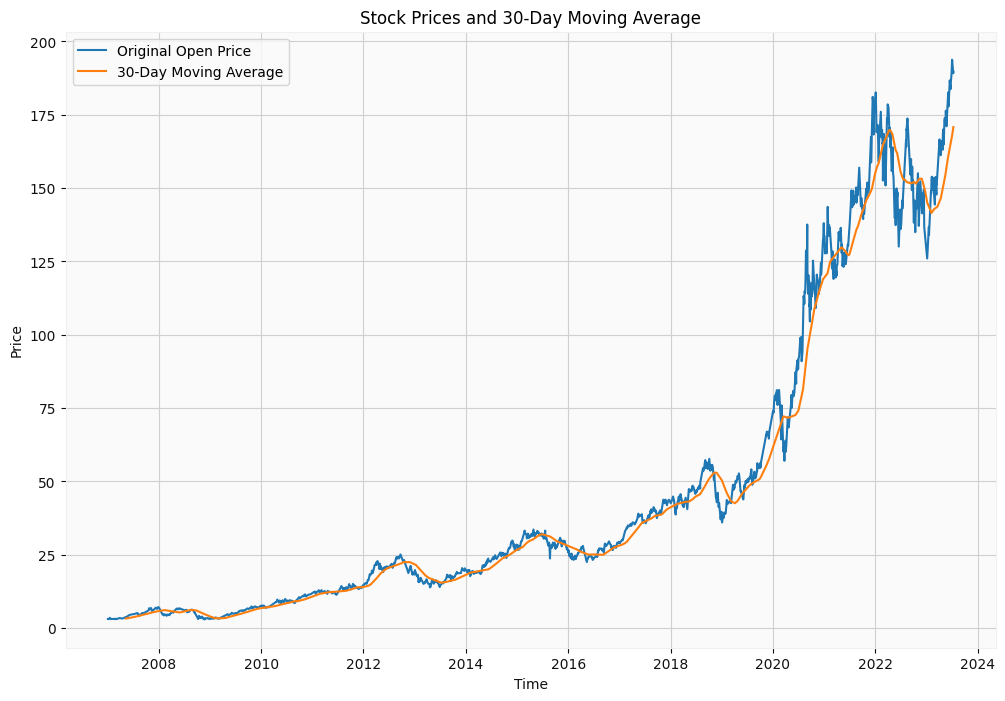

In [23]:
# Calculate 90-day moving averages
df['MA_Open'] = df['open'].rolling(window=90).mean()

plt.figure(figsize=(12, 8))
plt.plot(df['open'], label='Original Open Price')
plt.plot(df['MA_Open'], label='30-Day Moving Average')
plt.title('Stock Prices and 30-Day Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

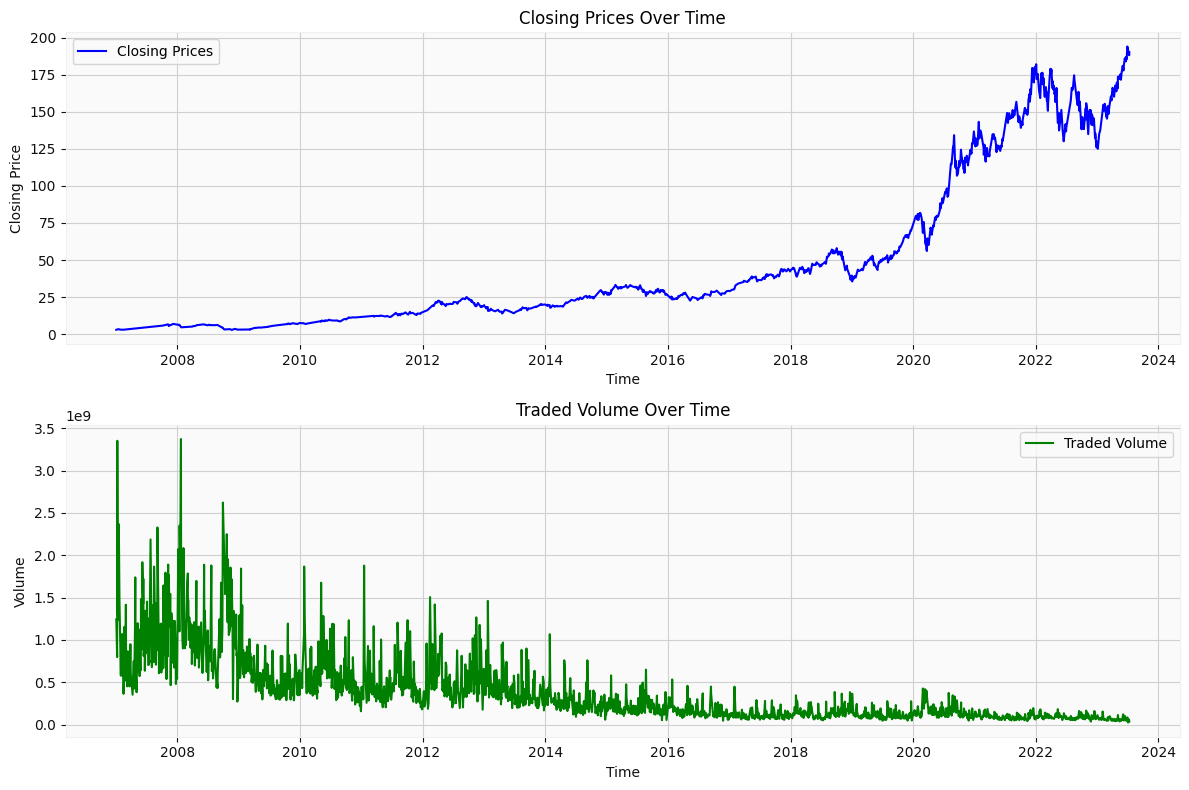

In [24]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(df['close'], label='Closing Prices', color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['volume'], label='Traded Volume', color='green')
plt.title('Traded Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


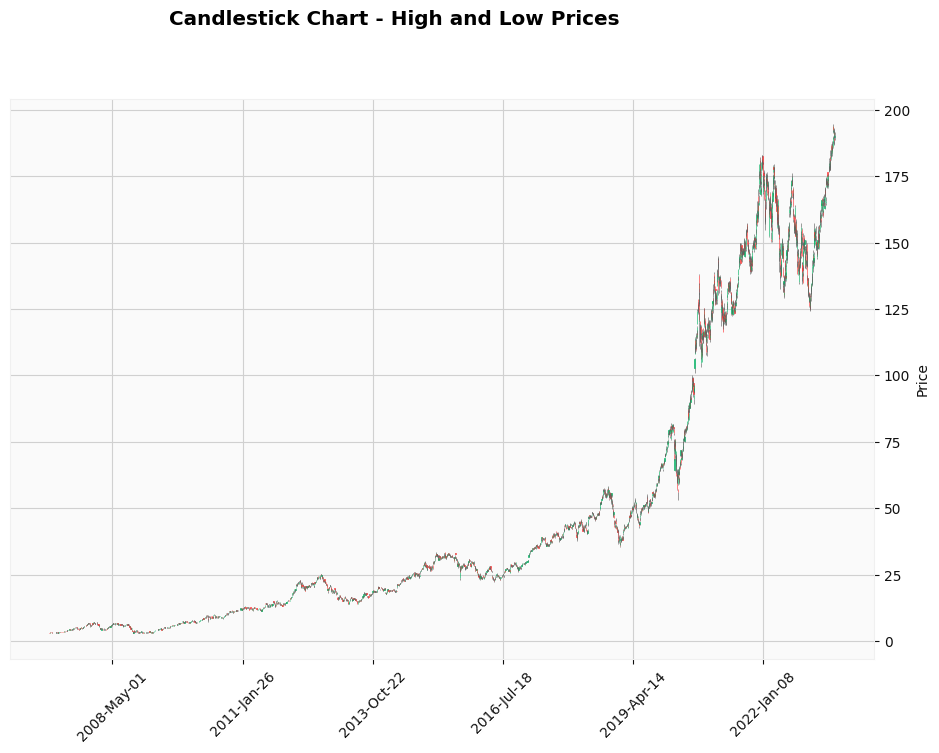

In [25]:
import mplfinance as mpf


ohlc_data = df[['open', 'high', 'low', 'close']]

mpf.plot(ohlc_data, type='candle', style='yahoo', figsize=(12, 8),
         title='Candlestick Chart - High and Low Prices',
         ylabel='Price', ylabel_lower='Volume', show_nontrading=True)

plt.show()

In [26]:
selected_columns = ['open', 'close', 'high', 'low']

summary_stats = df[selected_columns].describe()

print(summary_stats)

means = df[selected_columns].mean()
medians = df[selected_columns].median()
std_devs = df[selected_columns].std()

print("Mean:")
print(means)

print("\nMedian:")
print(medians)

print("\nStandard Deviation:")
print(std_devs)

              open        close         high          low
count  4159.000000  4159.000000  4159.000000  4159.000000
mean     46.362788    46.396058    46.881127    45.865790
std      50.235593    50.293482    50.843874    49.680104
min       2.835400     2.792900     2.928600     2.792900
25%      11.955700    11.947150    12.028400    11.853600
50%      25.775000    25.825000    26.262800    25.680000
75%      52.263750    52.231250    52.626250    51.796250
max     193.780000   193.970000   194.480000   191.760000
Mean:
open     46.362788
close    46.396058
high     46.881127
low      45.865790
dtype: float64

Median:
open     25.7750
close    25.8250
high     26.2628
low      25.6800
dtype: float64

Standard Deviation:
open     50.235593
close    50.293482
high     50.843874
low      49.680104
dtype: float64


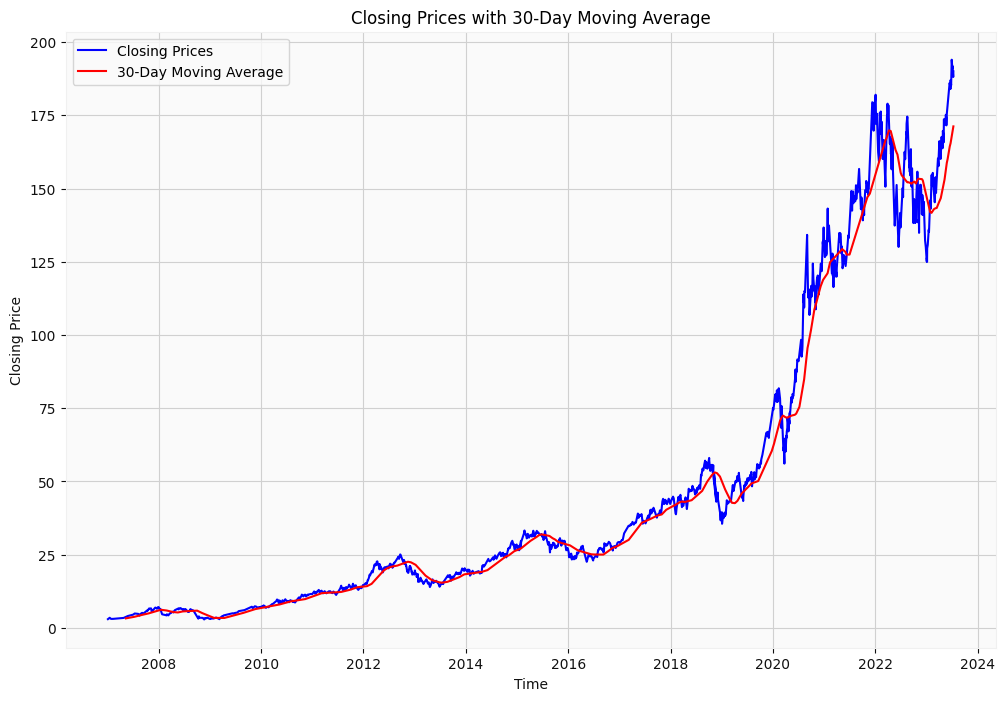

In [27]:
# Calculate a 90-day moving average for closing prices
df['MA_Close'] = df['close'].rolling(window=90).mean()

plt.figure(figsize=(12, 8))
plt.plot(df['close'], label='Closing Prices', color='blue')
plt.plot(df['MA_Close'], label='30-Day Moving Average', color='red')
plt.title('Closing Prices with 30-Day Moving Average')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [28]:
df = pd.read_csv('AAPL, 1D 01012007-12072023.csv')

df['time'] = pd.to_datetime(df['time'], unit='s')
df['year'] = df['time'].dt.year

average_closing_prices = df.groupby('year')['close'].mean()

year1 = 2010
year2 = 2011

year1_data = df[df['year'] == year1]['close']
year2_data = df[df['year'] == year2]['close']

t_statistic, p_value = ttest_ind(year1_data, year2_data)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('The difference in average closing prices is statistically significant.')
else:
    print('There is no significant difference in average closing prices.')

T-statistic: -36.2294666293064
P-value: 3.511887723714795e-142
The difference in average closing prices is statistically significant.


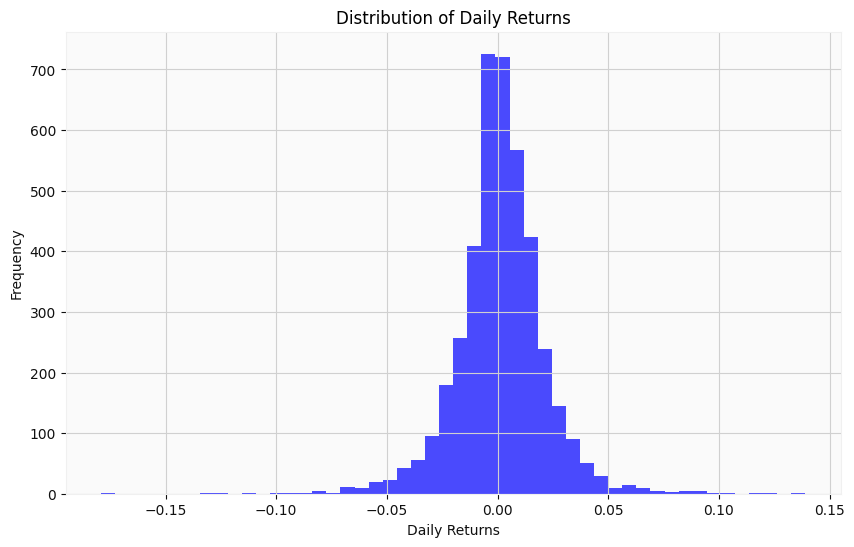

Shapiro-Wilk Test:
Test Statistic: 0.9406672716140747
P-value: 6.185059009108278e-38

D'Agostino and Pearson's Test:
Test Statistic: 535.5862106742969
P-value: 4.999563172686955e-117


In [29]:
from scipy.stats import shapiro, normaltest

df['daily_returns'] = df['close'].pct_change()

df = df.dropna()

plt.figure(figsize=(10, 6))
plt.hist(df['daily_returns'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

shapiro_test_stat, shapiro_p_value = shapiro(df['daily_returns'])
dagostino_test_stat, dagostino_p_value = normaltest(df['daily_returns'])

print(f'Shapiro-Wilk Test:')
print(f'Test Statistic: {shapiro_test_stat}')
print(f'P-value: {shapiro_p_value}')
print('')

print(f'D\'Agostino and Pearson\'s Test:')
print(f'Test Statistic: {dagostino_test_stat}')
print(f'P-value: {dagostino_p_value}')

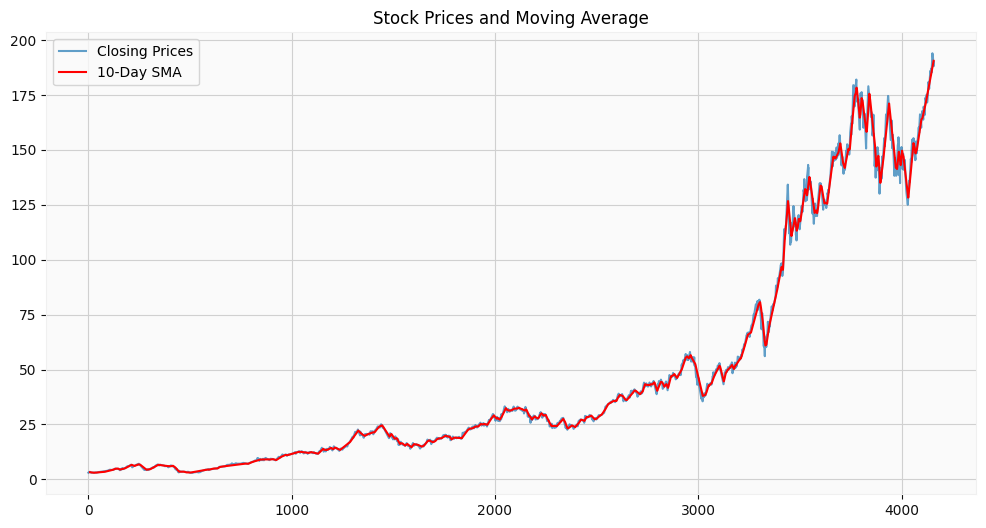

In [30]:
# Calculate a simple moving average (SMA) using convolution
window_size = 10
sma = np.convolve(df['close'], np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Closing Prices', alpha=0.7)
plt.plot(np.arange(window_size-1, len(df['close'])), sma, label=f'{window_size}-Day SMA', color='red')
plt.legend()
plt.title('Stock Prices and Moving Average')
plt.show()

Correlation Matrix:
[[ 1.         -0.51731482  0.9999547   0.99977903  0.99989493  0.99989829
   0.77316413]
 [-0.51731482  1.         -0.51732986 -0.51716004 -0.51615506 -0.51849553
  -0.20844246]
 [ 0.9999547  -0.51732986  1.          0.99989884  0.9999599   0.99996019
   0.77349327]
 [ 0.99977903 -0.51716004  0.99989884  1.          0.99991263  0.99989446
   0.7748114 ]
 [ 0.99989493 -0.51615506  0.9999599   0.99991263  1.          0.99987309
   0.77723588]
 [ 0.99989829 -0.51849553  0.99996019  0.99989446  0.99987309  1.
   0.77013736]
 [ 0.77316413 -0.20844246  0.77349327  0.7748114   0.77723588  0.77013736
   1.        ]]


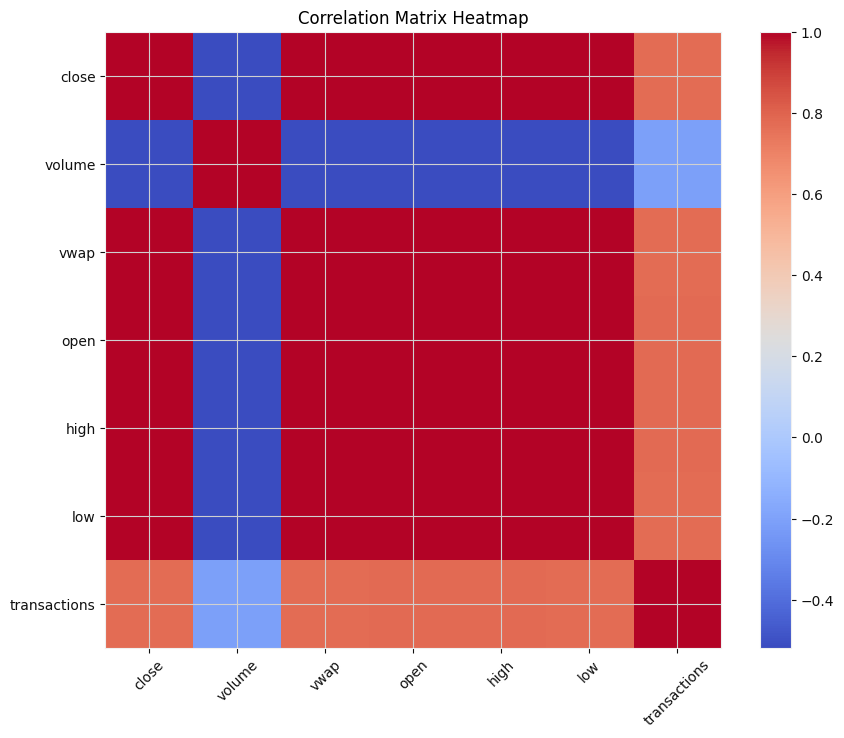

In [31]:
selected_columns = ['close', 'volume', 'vwap', 'open', 'high', 'low', 'transactions']
correlation_matrix = np.corrcoef(df[selected_columns].T)

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(selected_columns)), selected_columns, rotation=45)
plt.yticks(range(len(selected_columns)), selected_columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

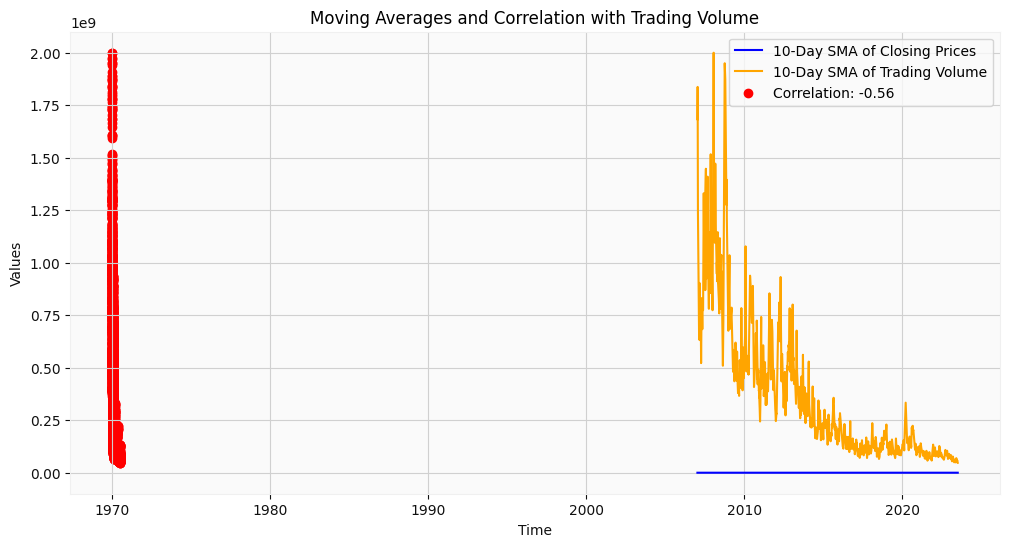

In [32]:
# Calculate moving averages for closing prices and trading volume
window_size_close = 10
window_size_volume = 10

df['sma_close'] = df['close'].rolling(window=window_size_close).mean()
df['sma_volume'] = df['volume'].rolling(window=window_size_volume).mean()

df = df.dropna()

correlation = np.corrcoef(df['sma_close'], df['sma_volume'])[0, 1]

plt.figure(figsize=(12, 6))

plt.plot(df['time'], df['sma_close'], label=f'{window_size_close}-Day SMA of Closing Prices', color='blue')
plt.plot(df['time'], df['sma_volume'], label=f'{window_size_volume}-Day SMA of Trading Volume', color='orange')

plt.scatter(df['sma_close'], df['sma_volume'], color='red', label=f'Correlation: {correlation:.2f}')

plt.legend()
plt.title('Moving Averages and Correlation with Trading Volume')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()